In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Set up paths 
data_path = '../data/UCI_HAR_Dataset/'

In [3]:
# Load sensor data (Accelerometer + Gyroscope data)
X_train = pd.read_csv(data_path + 'train/X_train.txt', sep='\s+', header=None)
X_test = pd.read_csv(data_path + 'test/X_test.txt', sep='\s+', header=None)

In [4]:
# Load activity labels
y_train = pd.read_csv(data_path + 'train/y_train.txt', sep='\s+', header=None)
y_test = pd.read_csv(data_path + 'test/y_test.txt', sep='\s+', header=None)

In [5]:
# Load features for column names
features = pd.read_csv(data_path + 'features.txt', sep='\s+', header=None)

In [6]:
# Assign feature names to the sensor data
X_train.columns = features[1].values
X_test.columns = features[1].values

# Load activity labels (map them to activity names)
activity_labels = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}


In [7]:
# Map activity labels to names
y_train[0] = y_train[0].map(activity_labels)
y_test[0] = y_test[0].map(activity_labels)

In [8]:
# Verify data
X_train.head(), y_train.head()

(   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
 0           0.288585          -0.020294          -0.132905         -0.995279   
 1           0.278419          -0.016411          -0.123520         -0.998245   
 2           0.279653          -0.019467          -0.113462         -0.995380   
 3           0.279174          -0.026201          -0.123283         -0.996091   
 4           0.276629          -0.016570          -0.115362         -0.998139   
 
    tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
 0         -0.983111         -0.913526         -0.995112         -0.983185   
 1         -0.975300         -0.960322         -0.998807         -0.974914   
 2         -0.967187         -0.978944         -0.996520         -0.963668   
 3         -0.983403         -0.990675         -0.997099         -0.982750   
 4         -0.980817         -0.990482         -0.998321         -0.979672   
 
    tBodyAcc-mad()-Z  tBodyAcc-max()-X  ..

In [10]:
# Normalize the sensor data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# Verify the normalization
X_train_scaled[:5]

array([[ 0.20064157, -0.0636826 , -0.41962845, ..., -0.68721921,
         0.40794614, -0.00756789],
       [ 0.05594788,  0.03148567, -0.25390836, ..., -0.694138  ,
         0.40911698,  0.00787517],
       [ 0.07351535, -0.04341648, -0.07629468, ..., -0.702239  ,
         0.4102883 ,  0.02650234],
       [ 0.06669577, -0.20842166, -0.24971245, ..., -0.70168389,
         0.41465007,  0.03171414],
       [ 0.03046897,  0.02758722, -0.10984784, ..., -0.70015171,
         0.42546296,  0.04522502]])

In [11]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train[0])

RandomForestClassifier(random_state=42)

In [12]:
# Make predictions and evaluate model
y_pred_rf = rf_model.predict(X_test_scaled)


In [13]:
# Evaluation metrics
print("Random Forest - Classification Report:\n", classification_report(y_test[0], y_pred_rf))

Random Forest - Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.90      0.90       491
          STANDING       0.91      0.92      0.91       532
           WALKING       0.89      0.97      0.93       496
WALKING_DOWNSTAIRS       0.96      0.87      0.91       420
  WALKING_UPSTAIRS       0.90      0.89      0.90       471

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



In [14]:
# Initialize and train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train[0])

# Make predictions and evaluate model
y_pred_svm = svm_model.predict(X_test_scaled)

In [15]:
# Evaluation metrics
print("SVM - Classification Report:\n", classification_report(y_test[0], y_pred_svm))

SVM - Classification Report:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.97      0.96      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [15]:
# Initialize and train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train[0])

# Make predictions and evaluate model
y_pred_knn = knn_model.predict(X_test_scaled)

In [16]:
# Evaluation metrics
print("KNN - Classification Report:\n", classification_report(y_test[0], y_pred_knn))

KNN - Classification Report:
                     precision    recall  f1-score   support

            LAYING       0.99      0.96      0.98       537
           SITTING       0.88      0.76      0.82       491
          STANDING       0.80      0.93      0.86       532
           WALKING       0.82      0.97      0.89       496
WALKING_DOWNSTAIRS       0.95      0.75      0.84       420
  WALKING_UPSTAIRS       0.90      0.89      0.89       471

          accuracy                           0.88      2947
         macro avg       0.89      0.88      0.88      2947
      weighted avg       0.89      0.88      0.88      2947



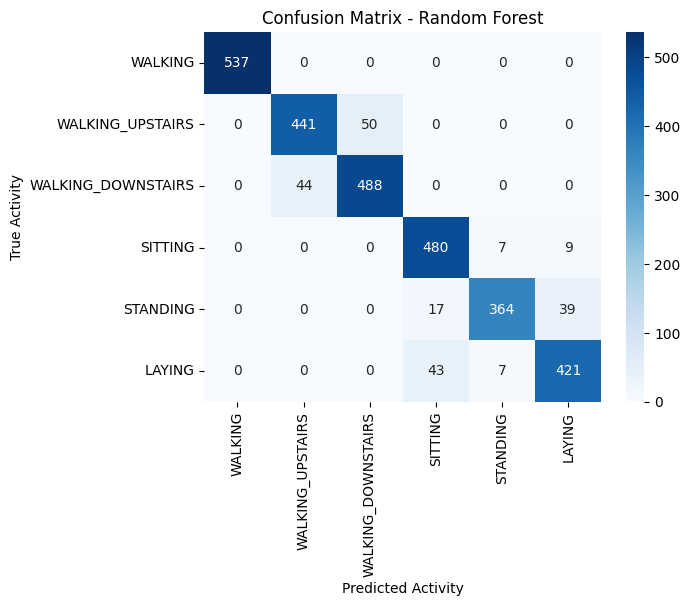

In [17]:
# Plot confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test[0], y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=activity_labels.values(), yticklabels=activity_labels.values())
plt.xlabel('Predicted Activity')
plt.ylabel('True Activity')
plt.title('Confusion Matrix - Random Forest')
plt.show()

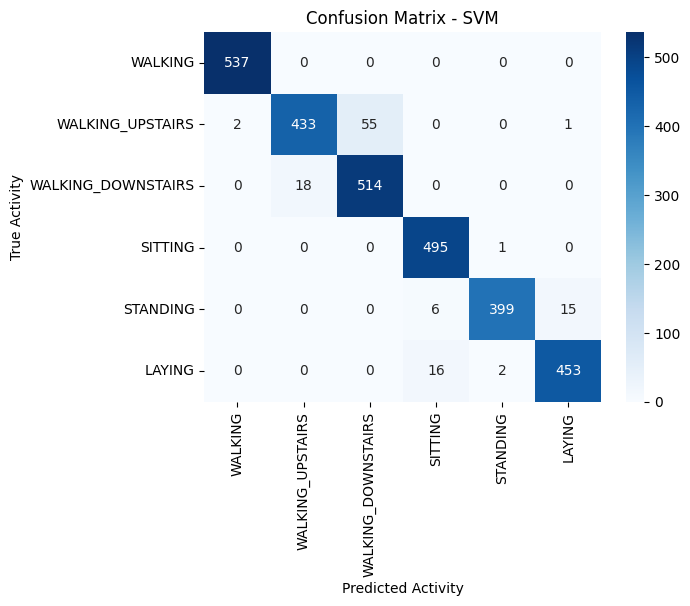

In [19]:
# Plot confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test[0], y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=activity_labels.values(), yticklabels=activity_labels.values())
plt.xlabel('Predicted Activity')
plt.ylabel('True Activity')
plt.title('Confusion Matrix - SVM')
plt.show()


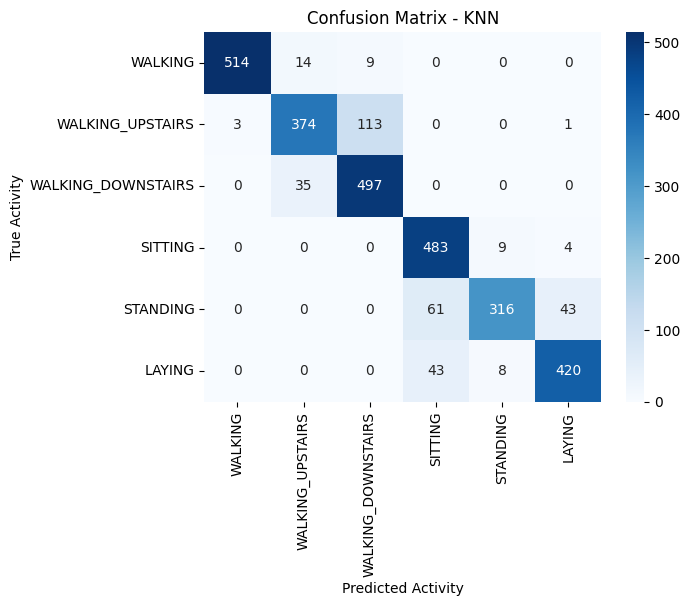

In [20]:
# Plot confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test[0], y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=activity_labels.values(), yticklabels=activity_labels.values())
plt.xlabel('Predicted Activity')
plt.ylabel('True Activity')
plt.title('Confusion Matrix - KNN')
plt.show()
